In [1]:
import boto3
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np



In [2]:
dynamodb = boto3.client('dynamodb', region_name='us-east-1')
table_name = 'discussion_table'
column_name = 'message'

# Define the ProjectionExpression to retrieve only the specified column
projection_expression = f"{column_name}"

# Perform a Scan operation to extract the column from multiple items
response = dynamodb.scan(
    TableName=table_name,
    ProjectionExpression=projection_expression
)

# Extract the column from each item in the response
column_values = [item[column_name] for item in response['Items']]


In [3]:
print (column_values)

[{'L': [{'M': {'msg': {'S': 'welcome to biat bot bilel1234 if  you need to know the commandes  send "help" '}, 'from': {'S': 'bot'}}}, {'M': {'msg': {'S': 'hi'}, 'from': {'S': 'user'}}}, {'M': {'msg': {'S': 'Hi there need some help '}, 'from': {'S': 'bot'}}}]}, {'L': [{'M': {'msg': {'S': 'welcome to biat bot sana123 if  you need to know the commandes  send "help" '}, 'from': {'S': 'bot'}}}, {'M': {'msg': {'S': 'Hi'}, 'from': {'S': 'user'}}}, {'M': {'msg': {'S': 'Hi there! How may I assist you?'}, 'from': {'S': 'bot'}}}, {'M': {'msg': {'S': 'Help'}, 'from': {'S': 'user'}}}, {'M': {'msg': {'S': 'here to assist '}, 'from': {'S': 'bot'}}}, {'M': {'msg': {'S': 'show me card'}, 'from': {'S': 'user'}}}, {'M': {'msg': {'S': 'press the name of the card you want to know about '}, 'from': {'S': 'bot'}}}, {'M': {'msg': {'S': 'branch in my zone'}, 'from': {'S': 'user'}}}, {'M': {'msg': {'S': 'sure, tell us your location'}, 'from': {'S': 'bot'}}}, {'M': {'msg': {'S': 'Sfax'}, 'from': {'S': 'user'}}}

In [4]:
msg_values = [item['M']['msg']['S'] for sublist in  column_values for item in sublist['L'] if item['M']['from']['S'] == 'user']
print(msg_values)

['hi', 'Hi', 'Help', 'show me card', 'branch in my zone', 'Sfax', 'What are the requirements for opening a business account', 'Help', 'Can I transfer money to another account', 'what is the current exchange rate for foreign currency', 'How can I apply for a loan', 'Can I dispute a transaction on my account', 'How can I apply for a loan', 'what is the current exchange rate for foreign currency', 'Can I dispute a transaction on my account', 'Hi', 'Account', 'Thanks', 'Hi', "I'm new client of biat bank", 'Help', 'how do i open a new account', 'branch in my zone', 'Gabes', 'What are the current interest rates', 'I want to change currency', '9000', 'Yen', 'How can I apply for a loan', 'What are the options for withdrawing cash from my account', 'Thanks', 'Can I view my transaction history online', 'Help', 'Can I dispute a transaction on my account', 'What are the current interest rates', 'Hi', 'Branch next to me', 'Nasr2', 'Branch next to me', 'Lac2', 'Branch next to me', 'Kac', 'Branch nex

In [5]:
dispute=0
business=0
interest=0
transfer=0
loan=0
transaction=0
mortgage=0
withdrawing=0
account=0
exchange_rate=0
changing_currency=0
location=0
card=0
msg_values=[x.lower() for x in msg_values]
for i in msg_values:
    if 'dispute' in i.lower():
        dispute+=1
    if 'business' in i.lower():
        business+=1
    if 'interest' in i.lower():
        interest+=1
    if 'transfer' in i.lower():
        transfer+=1
    if 'transaction' in i.lower():
        transaction+=1
    if 'mortgage' in i.lower():
        mortgage+=1
    if 'withdrawing' in i.lower():
        withdrawing+=1
    if 'account' in i.lower():
        account+=1
    if 'exchange_rate' in i.lower():
        exchange_rate+=1
    if 'change' in i.lower():
        changing_currency+=1
    if 'branch'  in i.lower():
        location+=1
    if 'loan' in i.lower():
        loan+=1
    if 'card' in i.lower():
        card+=1
    


In [6]:


columns=['name','values']
data=[['dispute',dispute],['business',business],['interest',interest],['transfer',transfer],['transaction',transaction],['mortgage',mortgage],['withdrawing',withdrawing],
      ['account',account],['exchange_rate',exchange_rate],['changing_currency',changing_currency],['location',location],['loan',loan],['card',card]]
df = pd.DataFrame(data,columns=columns)
print(df)

                 name  values
0             dispute       4
1            business       3
2            interest       2
3            transfer       2
4         transaction       6
5            mortgage       0
6         withdrawing       2
7             account      12
8       exchange_rate       0
9   changing_currency      18
10           location      11
11               loan       7
12               card       5


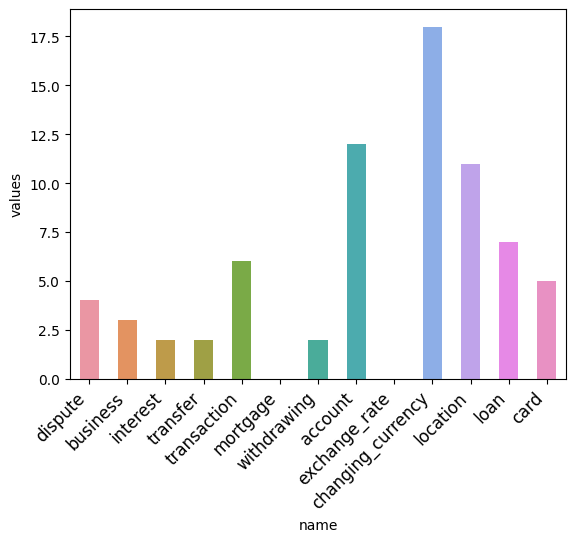

In [7]:
ax=sns.barplot(x="name", y="values", data=df,width=0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.xticks(fontsize=12)
plt.show()

In [8]:
msg_values_bot = [item['M']['msg']['S'] for sublist in  column_values for item in sublist['L'] if item['M']['from']['S'] == 'bot']
print(msg_values_bot)

['welcome to biat bot bilel1234 if  you need to know the commandes  send "help" ', 'Hi there need some help ', 'welcome to biat bot sana123 if  you need to know the commandes  send "help" ', 'Hi there! How may I assist you?', 'here to assist ', 'press the name of the card you want to know about ', 'sure, tell us your location', 'The closest Biat branch to your location is BIAT at PQQ3+PJJ, Sfax. The estimated distance is 0.58 km.', " to open a business account, you will need to provide certain documents such as your business registration and tax ID number,as well as proof of identification for the authorized signers on the account. Some banks may also require additional documentation,such as a business plan or financial statements.  It's best to check with the financial institution where you plan to open the account directly to confirm their specific requirements", 'welcome to biat bot souhajaafri if  you need to know the commandes  send "help" ', 'here to assist ', 'please try again',

In [9]:
Euro=0
Usd=0
JapanaseYen=0
FrancSuisse=0
PoundSterling=0

for i in msg_values_bot:
    if 'EUR' in i:
        Euro+=1
    if 'USD' in i:
        Usd+=1
    if 'JPY' in i:
        JapanaseYen+=1
    if 'CHF' in i:
        FrancSuisse+=1
    if 'GBP' in i:
        PoundSterling+=1

columns=['name','values']
data=[['Euro',Euro],['Usd',Usd],['Japanase Yen',JapanaseYen],['Franc Suisse',FrancSuisse],['Pound Sterling',PoundSterling]]
df_currency = pd.DataFrame(data,columns=columns)
print(df_currency)
    


             name  values
0            Euro       5
1             Usd       4
2    Japanase Yen       0
3    Franc Suisse       1
4  Pound Sterling       2


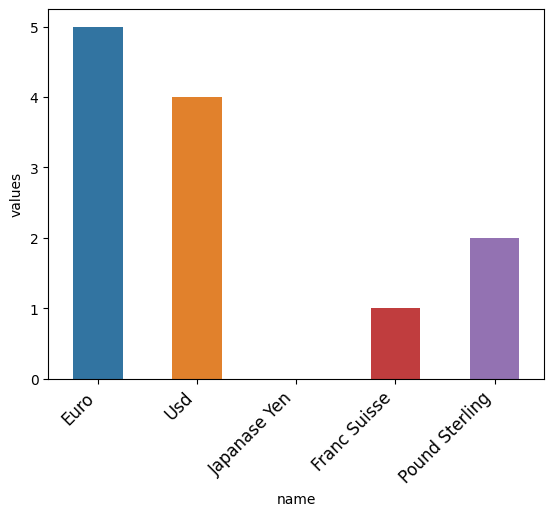

In [10]:
ax=sns.barplot(x="name", y="values", data=df_currency,width=0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.xticks(fontsize=12)
plt.show()

In [11]:
msg_values = [item['M']['msg']['S'] for sublist in  column_values for item in sublist['L'] if item['M']['from']['S'] == 'user']
CarteTechnologique=0
CarteClassique=0
CarteCash=0
CarteFLY=0
CarteCHABEB=0


for i in msg_values:
    if 'Carte Technologique' in i:
        CarteTechnologique+=1
    if 'Carte VISA ou MasterCard classique' in i:
        CarteClassique+=1
    if 'Carte CASH' in i:
        CarteCash+=1
    if 'Carte FLY' in i:
        CarteFLY+=1
    if 'Carte CHABEB' in i:
        CarteCHABEB+=1


columns_=['name','values']
data_=[['Carte Technologique',CarteTechnologique],['Carte classique',CarteClassique],['Carte CASH',CarteCash],['Carte FLY',CarteFLY],['Carte CHABEB',CarteCHABEB]]
df_card = pd.DataFrame(data_,columns=columns_)
print(df_card)



                  name  values
0  Carte Technologique       0
1      Carte classique       0
2           Carte CASH       1
3            Carte FLY       2
4         Carte CHABEB       1


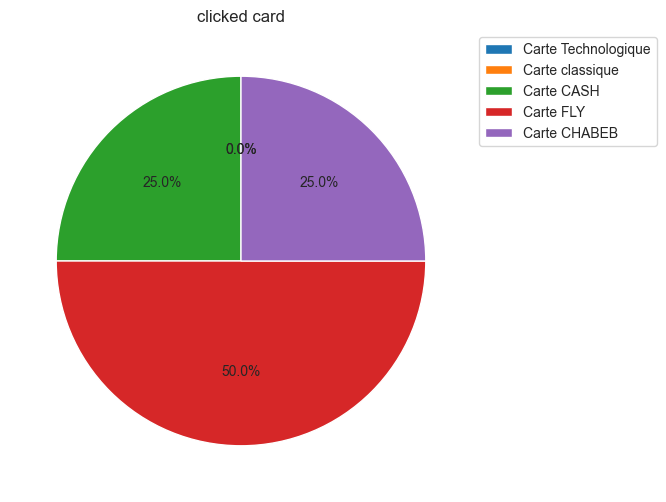

In [12]:
CarteTechnologique=(CarteTechnologique/5)*100
CarteClassique=(CarteClassique/5)*100
CarteCash=(CarteCash/5)*100
CarteFLY=(CarteFLY/5)*100
CarteCHABEB=(CarteCHABEB/5)*100
if CarteTechnologique+CarteClassique+CarteCash+CarteFLY+CarteCHABEB==0:
    print('no data found')
else:


    labels = ['Carte Technologique', 'Carte classique', 'Carte CASH', 'Carte FLY', 'Carte CHABEB']
    sizes = [CarteTechnologique,CarteClassique,CarteCash,CarteFLY,CarteCHABEB]

    # create pie chart
    plt.figure(figsize=(6,6))
    sns.set_style("whitegrid")
    plt.pie(sizes, labels=None, autopct='%1.1f%%', startangle=90)

    # add title and legend
    plt.title('clicked card')
    plt.legend(labels,loc='upper left', bbox_to_anchor=(1,1))
    plt.savefig('card.png',bbox_inches='tight')
    plt.show()

In [13]:
list_location=[x for x in msg_values_bot if  'The closest Biat' in x ]
list_location_final=[]
location_dict={}
location_numbers=[]
for i in list_location:
    i.replace('The closest Biat branch to your location is BIAT at','')
    i.replace('The closest Biat branch to your location is Biat at','')
    i.replace('. The estimated distance is 0.58 km','')
    list_location_final.append(i.replace('The closest Biat branch to your location is BIAT at','').replace('The closest Biat branch to your location is Biat at','')[0:17])
for i in list_location_final:
   location_dict.update({i: i})
for i in location_dict:
    j=0
    for a in list_location_final:
        if i==a:
            j=j+1
    location_numbers.append(j)
list_location_final

[' PQQ3+PJJ, Sfax. ',
 'The closest Biat ',
 ' R5CQ+3XM, Tunis.',
 ' 7V99+QWG, Bizert',
 ' 1 C100e, Monasti']

In [14]:
location_final=[]
i=0
for location in location_dict:
    location_final.append([location,location_numbers[i]])
    i=i+1
location_final
if len(location_final)>5:
    location_final=location_final[0:5]

In [15]:
columns_=['value','location_name']
df_location= pd.DataFrame(location_final,columns=columns)
df_location.sort_values(axis=0,by=['values'],inplace=True,ascending=False)
df_location


,name,values
0,"PQQ3+PJJ, Sfax.",1
1,The closest Biat,1
2,"R5CQ+3XM, Tunis.",1
3,"7V99+QWG, Bizert",1
4,"1 C100e, Monasti",1


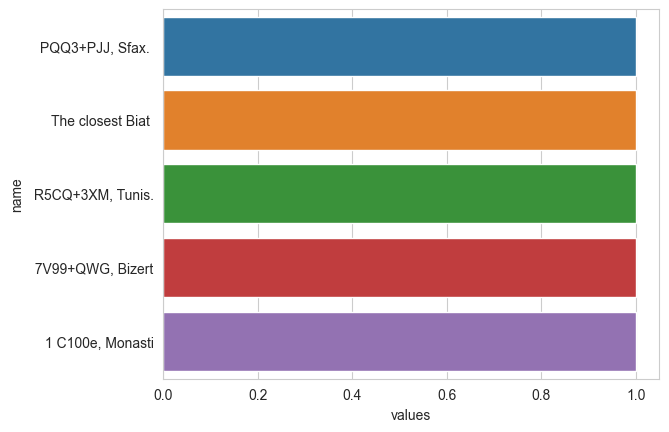

In [16]:
ax=sns.barplot( x='values',y= 'name',data=df_location )


plt.show()

In [17]:
dynamodb = boto3.resource('dynamodb',region_name='us-east-1')
table = dynamodb.Table('discussion_table')

# Perform the scan to retrieve all items in the table
response = table.scan()

# Initialize an empty dictionary to store the data for every user
data_by_user = {}

# Iterate over the items in the response and group them by user ID
for item in response['Items']:
    user_id = item['user_name']
    if user_id not in data_by_user:
        data_by_user[user_id] = []
    data_by_user[user_id].append(item['message'])

list_user=[]
list_msg=[]
list_msg_extracted=[]
list_msg_values=[]

        
# Print the data for every user
for user_id, messages in data_by_user.items():
    print(f"User ID: {user_id}, Messages: {messages}")
    list_user.append(user_id)
    list_msg.append(messages)
print(data_by_user)
print(list_user)
for i in list_msg:
    for j in i:
        list_msg_extracted.append(j)
for i in list_msg_extracted:
    list_msg_values.append([item['msg'] for item in i if item['from']=='user'])

print(list_msg_values)

User ID: bilel1234, Messages: [[{'msg': 'welcome to biat bot bilel1234 if  you need to know the commandes  send "help" ', 'from': 'bot'}, {'msg': 'hi', 'from': 'user'}, {'msg': 'Hi there need some help ', 'from': 'bot'}]]
User ID: sana123, Messages: [[{'msg': 'welcome to biat bot sana123 if  you need to know the commandes  send "help" ', 'from': 'bot'}, {'msg': 'Hi', 'from': 'user'}, {'msg': 'Hi there! How may I assist you?', 'from': 'bot'}, {'msg': 'Help', 'from': 'user'}, {'msg': 'here to assist ', 'from': 'bot'}, {'msg': 'show me card', 'from': 'user'}, {'msg': 'press the name of the card you want to know about ', 'from': 'bot'}, {'msg': 'branch in my zone', 'from': 'user'}, {'msg': 'sure, tell us your location', 'from': 'bot'}, {'msg': 'Sfax', 'from': 'user'}, {'msg': 'The closest Biat branch to your location is BIAT at PQQ3+PJJ, Sfax. The estimated distance is 0.58 km.', 'from': 'bot'}, {'msg': 'What are the requirements for opening a business account', 'from': 'user'}, {'msg': " 

In [18]:
msg_length=[]
for i in list_msg_values:
    msg_length.append(len(i))
msg_length
columns_=['name','msg_length']
data_=[]
for i in range(len(list_user)):
    data_.append([list_user[i],msg_length[i]])


df_user = pd.DataFrame(data_,columns=columns_)
print(df_user)

           name  msg_length
0     bilel1234           1
1       sana123           6
2   souhajaafri           8
3      believer           3
4    slimmeftah          17
5        bolbol          14
6       user123          19
7       yosramh          18
8      bilelml1           0
9       bilelml           0
10     user1236           0
11      user124           3
12   bileloues_           5
13   yosramh122           0
14    helasalmi          26


In [19]:
account_call=[]
branch_call=[]
loan_call=[]
card_call=[]
withdrawing_call=[]
business_call=[]
dispute_call=[]

for i in list_msg_values:
    account_user=0
    branch_user=0
    loan_user=0
    card_user=0
    withdrawing_user=0
    business_user=0
    dispute_user=0
    for sentences in i:
        if 'account' in sentences.lower():
            account_user+=1
        if 'branch' in sentences.lower():
           branch_user+=1
        if 'loan' in sentences.lower():
            loan_user+=1
        if 'card' in sentences.lower():
            card_user+=1  
        if 'withdrawing' in sentences.lower():
            withdrawing_user+=1
        if 'business' in sentences.lower():
            business_user+=1
        if 'dispute' in sentences.lower():
            dispute_user+=1
        
        

    branch_call.append(branch_user)
    account_call.append(account_user)
    loan_call.append(loan_user)
    card_call.append(card_user)
    withdrawing_call.append(withdrawing_user)
    business_call.append(business_user)
    dispute_call.append(dispute_user)

df_user['account_call']=account_call
df_user['branch_call']=branch_call
df_user['loan_call']=loan_call
df_user['card_call']=card_call
df_user['withdrawing_cal']=withdrawing_call
df_user['business_call']=business_call
df_user['dispute_call']=dispute_call




df_user_=df_user.iloc[:,1:]
df_user

        


,name,msg_length,account_call,branch_call,loan_call,card_call,withdrawing_cal,business_call,dispute_call
0,bilel1234,1,0,0,0,0,0,0,0
1,sana123,6,1,1,0,1,0,1,0
2,souhajaafri,8,3,0,2,0,0,0,2
3,believer,3,1,0,0,0,0,0,0
4,slimmeftah,17,3,1,1,0,1,0,1
5,bolbol,14,0,4,0,1,0,0,0
6,user123,19,0,0,0,1,0,0,0
7,yosramh,18,1,4,1,0,0,1,0
8,bilelml1,0,0,0,0,0,0,0,0
9,bilelml,0,0,0,0,0,0,0,0


In [20]:
client_data=pd.read_excel('train_client.xlsx')
x_data=client_data.iloc[:,:-1].iloc[:,1:]

y_data=client_data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split( x_data,y_data  ,test_size=0.2, random_state=42)


X_train.head()

,msg_length,account_call,branch_call,loan_call,card_call,withdrawing_cal,business_call,dispute_call
8,5,1,3,1,1,0,0,0
49,4,0,1,1,0,1,0,0
6,6,0,1,1,1,0,1,1
47,4,3,1,0,0,0,0,0
4,2,0,0,1,1,0,1,0


In [21]:
model=LogisticRegression(penalty='l2' ,max_iter=200,C=0.25)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7272727272727273


In [22]:
client =model.predict(df_user_)
df_user['potential_client']=client
df_user

,name,msg_length,account_call,branch_call,loan_call,card_call,withdrawing_cal,business_call,dispute_call,potential_client
0,bilel1234,1,0,0,0,0,0,0,0,0
1,sana123,6,1,1,0,1,0,1,0,1
2,souhajaafri,8,3,0,2,0,0,0,2,1
3,believer,3,1,0,0,0,0,0,0,0
4,slimmeftah,17,3,1,1,0,1,0,1,1
5,bolbol,14,0,4,0,1,0,0,0,1
6,user123,19,0,0,0,1,0,0,0,0
7,yosramh,18,1,4,1,0,0,1,0,1
8,bilelml1,0,0,0,0,0,0,0,0,0
9,bilelml,0,0,0,0,0,0,0,0,0


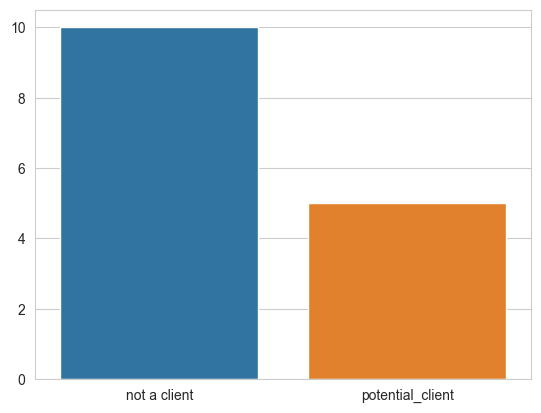

In [23]:
client_=[x for x in client]
counts = [client_.count(0), client_.count(1)]
ax=sns.barplot( x=['not a client','potential_client'] ,y= counts )

plt.show()

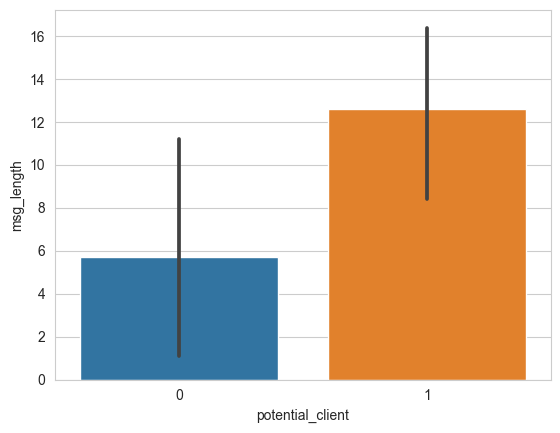

In [24]:
ax=sns.barplot( x='potential_client' ,y='msg_length' ,data=df_user )

plt.show()

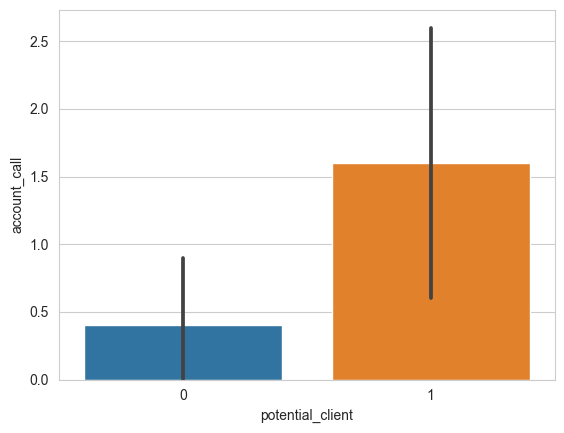

In [25]:
ax=sns.barplot( x='potential_client' ,y='account_call' ,data=df_user )

plt.show()

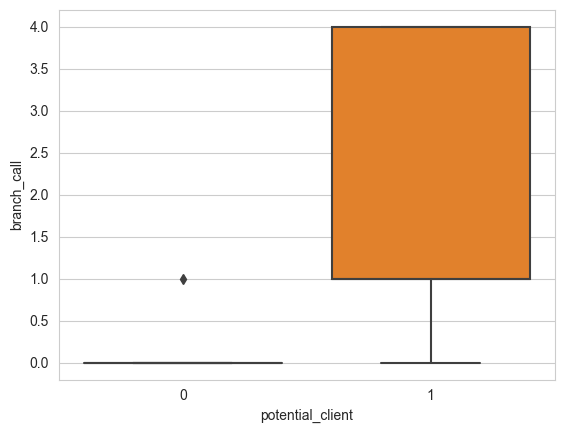

In [26]:
ax=sns.boxplot( x='potential_client' ,y='branch_call' ,data=df_user )